In [1]:
# Import libraries
import pandas as pd

# Load datasets
customers = pd.read_csv('./data/Customers.csv')
products = pd.read_csv('./data/Products.csv')
transactions = pd.read_csv('./data/Transactions.csv')

# Display the first few rows of each dataset
print("Customers Data:")
display(customers.head())

print("Products Data:")
display(products.head())

print("Transactions Data:")
display(transactions.head())


Customers Data:


,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


Products Data:


,ProductID,ProductName,Category,Price
0,P001,ActiveWear Biography,Books,169.30
1,P002,ActiveWear Smartwatch,Electronics,346.30
2,P003,ComfortLiving Biography,Books,44.12
3,P004,BookWorld Rug,Home Decor,95.69
4,P005,TechPro T-Shirt,Clothing,429.31


Transactions Data:


,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [2]:
print("Customers Shape:", customers.shape)
print("Products Shape:", products.shape)
print("Transactions Shape:", transactions.shape)


Customers Shape: (200, 4)
Products Shape: (100, 4)
Transactions Shape: (1000, 7)


In [3]:
print("Customers Info:")
customers.info()

print("\nProducts Info:")
products.info()

print("\nTransactions Info:")
transactions.info()


Customers Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   CustomerID    200 non-null    object
 1   CustomerName  200 non-null    object
 2   Region        200 non-null    object
 3   SignupDate    200 non-null    object
dtypes: object(4)
memory usage: 6.4+ KB

Products Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB

Transactions Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dt

In [4]:
print(transactions.describe())


          Quantity   TotalValue       Price
count  1000.000000  1000.000000  1000.00000
mean      2.537000   689.995560   272.55407
std       1.117981   493.144478   140.73639
min       1.000000    16.080000    16.08000
25%       2.000000   295.295000   147.95000
50%       3.000000   588.880000   299.93000
75%       4.000000  1011.660000   404.40000
max       4.000000  1991.040000   497.76000


In [5]:
print("Missing Values in Customers:")
print(customers.isnull().sum())

print("\nMissing Values in Products:")
print(products.isnull().sum())

print("\nMissing Values in Transactions:")
print(transactions.isnull().sum())


Missing Values in Customers:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64

Missing Values in Products:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64

Missing Values in Transactions:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
dtype: int64


In [6]:
customers = customers.dropna()  # Example: Drop rows with missing values


In [7]:
transactions['TotalValue'] = transactions['TotalValue'].fillna(0)


In [8]:
print("Duplicate Rows in Customers:", customers.duplicated().sum())
print("Duplicate Rows in Products:", products.duplicated().sum())
print("Duplicate Rows in Transactions:", transactions.duplicated().sum())


Duplicate Rows in Customers: 0
Duplicate Rows in Products: 0
Duplicate Rows in Transactions: 0


In [9]:
customers = customers.drop_duplicates()


In [10]:
# Merge Transactions with Customers
transactions_customers = transactions.merge(customers, on="CustomerID", how="left")

# Merge the result with Products
full_data = transactions_customers.merge(products, on="ProductID", how="left")

# Check the merged dataset
print(full_data.head())


  TransactionID CustomerID ProductID      TransactionDate  Quantity  \
0        T00001      C0199      P067  2024-08-25 12:38:23         1   
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue  Price_x     CustomerName         Region  SignupDate  \
0      300.68   300.68   Andrea Jenkins         Europe  2022-12-03   
1      300.68   300.68  Brittany Harvey           Asia  2024-09-04   
2      300.68   300.68  Kathryn Stevens         Europe  2024-04-04   
3      601.36   300.68  Travis Campbell  South America  2024-04-11   
4      902.04   300.68    Timothy Perez         Europe  2022-03-15   

                       ProductName     Category  Price_y  
0  ComfortLiving Bluetooth Speaker  Electronics   300.68  
1  ComfortLiving Bluetooth Speaker

In [11]:
top_products = full_data.groupby("ProductName")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Selling Products by Total Value:")
print(top_products)


Top 10 Selling Products by Total Value:
ProductName
ActiveWear Smartwatch      39096.97
SoundWave Headphones       25211.64
SoundWave Novel            24507.90
ActiveWear Jacket          22712.56
ActiveWear Rug             22314.43
TechPro Headphones         19513.80
BookWorld Cookbook         19221.99
BookWorld Sweater          18743.79
TechPro Textbook           18267.96
ActiveWear Cookware Set    18083.73
Name: TotalValue, dtype: float64


In [12]:
sales_by_region = full_data.groupby("Region")["TotalValue"].sum().sort_values(ascending=False)
print("Sales by Region:")
print(sales_by_region)


Sales by Region:
Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [13]:
active_customers = full_data.groupby("CustomerID")["TotalValue"].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Active Customers:")
print(active_customers)


Top 10 Most Active Customers:
CustomerID
C0141    10673.87
C0054     8040.39
C0065     7663.70
C0156     7634.45
C0082     7572.91
C0188     7111.32
C0059     7073.28
C0028     6819.57
C0099     6715.72
C0165     6708.10
Name: TotalValue, dtype: float64


In [14]:
category_sales = full_data.groupby("Category")["TotalValue"].sum()
print("Sales by Product Category:")
print(category_sales)


Sales by Product Category:
Category
Books          192147.47
Clothing       166170.66
Electronics    180783.50
Home Decor     150893.93
Name: TotalValue, dtype: float64


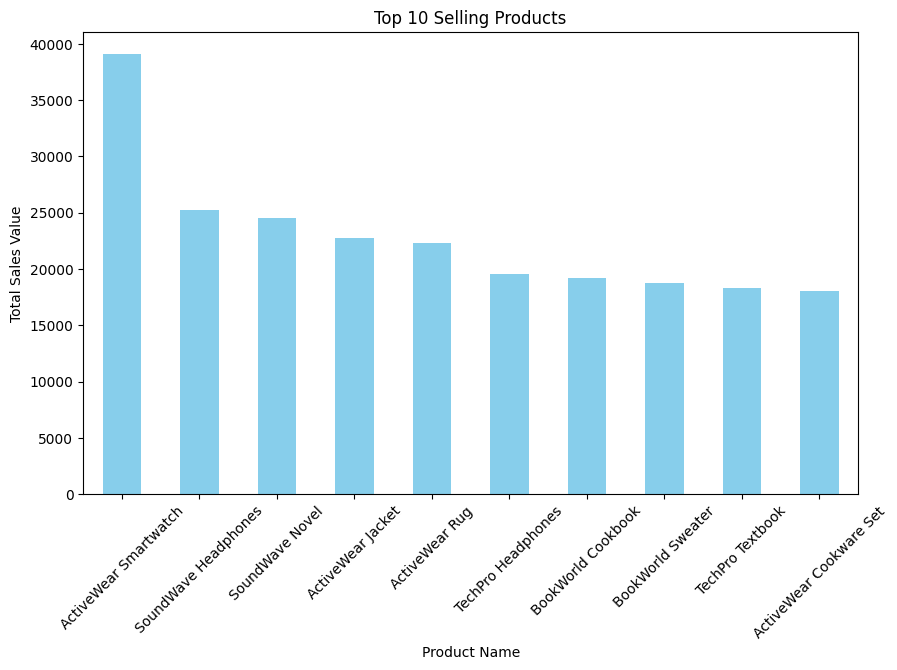

In [15]:
import matplotlib.pyplot as plt

top_products.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title("Top 10 Selling Products")
plt.xlabel("Product Name")
plt.ylabel("Total Sales Value")
plt.xticks(rotation=45)
plt.show()


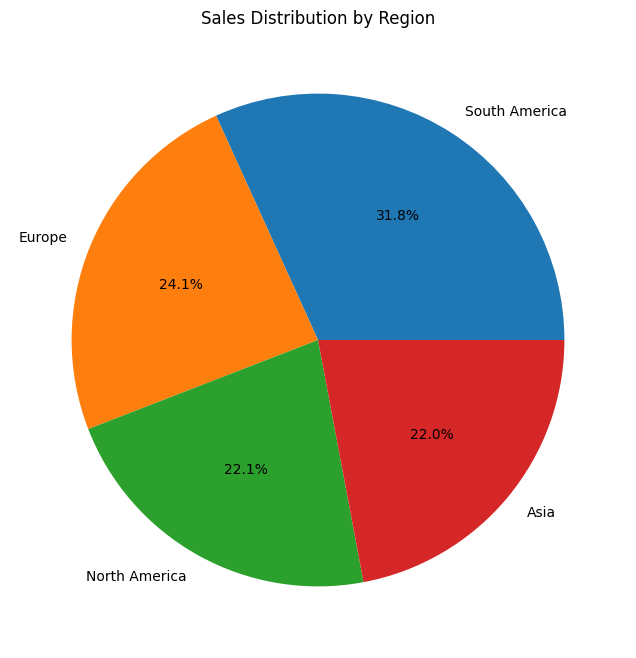

In [16]:
sales_by_region.plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8))
plt.title("Sales Distribution by Region")
plt.ylabel("")
plt.show()


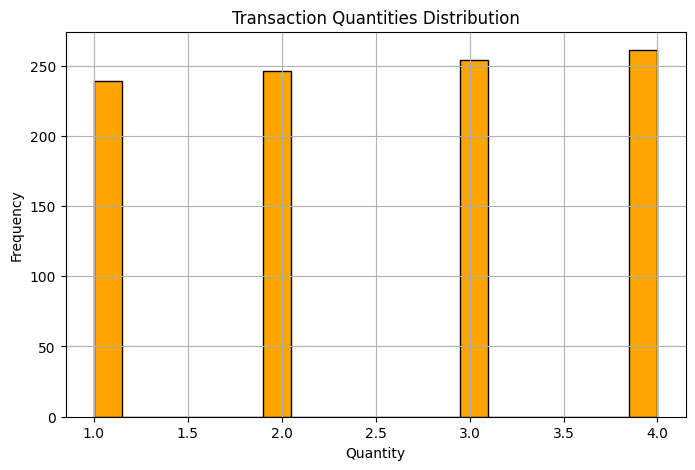

In [17]:
full_data["Quantity"].hist(bins=20, color='orange', edgecolor='black', figsize=(8, 5))
plt.title("Transaction Quantities Distribution")
plt.xlabel("Quantity")
plt.ylabel("Frequency")
plt.show()
